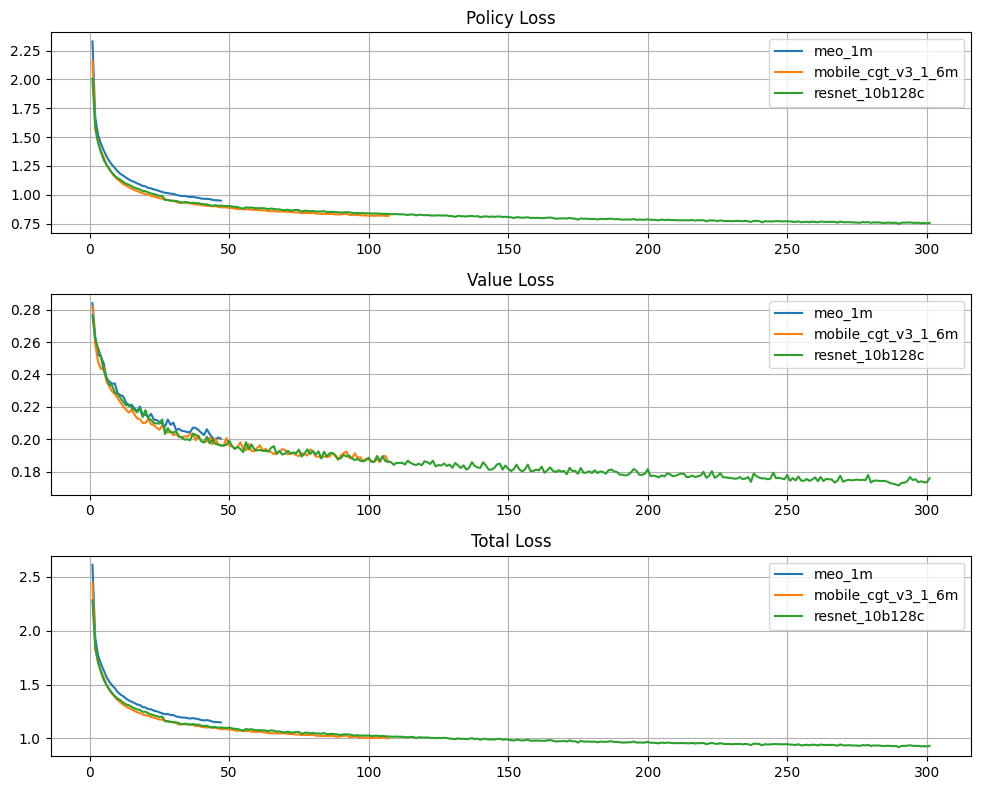

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 指定文件夹路径
logs_directory = 'logs'

# 获取logs目录下所有文件夹
model_folders = [folder for folder in os.listdir(logs_directory) if os.path.isdir(os.path.join(logs_directory, folder))]
# model_folders = ["mobile_vit", "mobile_cgt_v1", "mobile_cgt_v2", "mobile_cgt_v3", "resnet_10b128c"]
model_folders = ["meo_1m", "mobile_cgt_v3_1_6m", "resnet_10b128c"]
# model_folders = ["mobile_vit", "mobile_cgt_v2", "mobile_cgt_v3", "mobile_cgt_v1"]

# 用于存储不同模型的loss数据
total_loss = {}
value_loss = {}
policy_loss = {}

# 读取每个模型的loss.csv文件并存储数据
for folder in model_folders:
    csv_file = os.path.join(logs_directory, folder, 'loss/train_loss.csv')
    if os.path.exists(csv_file):
        df = pd.read_csv(csv_file, header=None)
        policy_loss[folder] = df.iloc[:, 0].values
        value_loss[folder] = df.iloc[:, 1].values
        total_loss[folder] = df.iloc[:, 2].values

# 找到最大长度的loss数据
policy_loss_max_length = max(len(data) for data in policy_loss.values())
value_loss_max_length = max(len(data) for data in value_loss.values())
total_loss_max_length = max(len(data) for data in total_loss.values())

# 将所有loss数据扩展到相同长度
for key, value in policy_loss.items():
    if len(value) < policy_loss_max_length:
        diff = policy_loss_max_length - len(value)
        policy_loss[key] = list(value) + [None] * diff
# 将所有loss数据扩展到相同长度
for key, value in value_loss.items():
    if len(value) < value_loss_max_length:
        diff = value_loss_max_length - len(value)
        value_loss[key] = list(value) + [None] * diff
# 将所有loss数据扩展到相同长度
for key, value in total_loss.items():
    if len(value) < total_loss_max_length:
        diff = total_loss_max_length - len(value)
        total_loss[key] = list(value) + [None] * diff


# 创建一个包含多个子图的图形区域，3 行 1 列，共 4 个子图
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for model, data in policy_loss.items():
    axs[0].plot(range(1, policy_loss_max_length + 1), data, label=model)
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Policy Loss')


for model, data in value_loss.items():
    axs[1].plot(range(1, value_loss_max_length + 1), data, label=model)
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Value Loss')

for model, data in total_loss.items():
    axs[2].plot(range(1, total_loss_max_length + 1), data, label=model)
axs[2].legend()
axs[2].grid(True)
axs[2].set_title('Total Loss')


# 调整子图之间的间距
plt.tight_layout()
plt.show()